<h1> Concrete Sub Tasks Summary</h1>

In [129]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [130]:
#Convert excel to csv file 
df = pd.read_excel('Concrete_TakeOffs.xlsx')  # parameter (sheetname='sheet_name') is optional
df.to_csv('Concrete_TakeOffs.csv', index=False)  # index=True to write row index

In [131]:
df.head()

,Sub Tasks Concrete,Total Quantity,To-Date Quantity,Earned
0,Continous Footings,50,35,0.700000
1,Spot Footings,200,125,0.625000
2,Building Foundation Walls,350,175,0.625000
3,Building Slabs,725,346,0.477241
4,Stairs & Landings,6,0,0.000000


In [132]:
class Summary(object):
    
    # Class object attributes
    # cy = cubic yards 

    # Cubic yard estimated costs installed
    est_cy = 212 

    # Cubic yard actual costs installed 
    act_cy = 217
    
    def __init__(self, quantity_installed = 1, quantity_estimated = 1):
        self.quantity_installed = quantity_installed
        self.quantity_estimated = quantity_estimated
    
    def SPI(self):
        return round((self.quantity_installed * Summary.est_cy) / (self.quantity_installed * Summary.act_cy), 2)
    
    def CPI(self):
        return round((self.quantity_installed * Summary.act_cy) / (self.quantity_installed * Summary.est_cy),2)
    
    def account_budget(self):
        return self.quantity_estimated * Summary.est_cy
    
    def forecast_budget(self):
        return self.quantity_estimated * Summary.act_cy

<h2>Create Sub Tasks Data Frames</h2>

In [133]:
#Create continous footings summary dataframe
cfqi = Summary(quantity_installed = df.iloc[0,2])
cfqe = Summary(quantity_estimated = df.iloc[0,1])
Continous_Footings_Summary = pd.DataFrame({
    'SPI' : [cfqi.SPI()] , 
    'CPI' : [cfqi.CPI()],
    'Budget' : [cfqe.account_budget()], 
    'Realized Risk' : [(cfqe.forecast_budget() - cfqe.account_budget())], 
    'Forecasted Budget': [cfqe.forecast_budget()] , 
    'Percent Complete': [((cfqi.quantity_installed/cfqe.quantity_estimated) * 100)]
})
Continous_Footings_Summary.rename(index={0:'Continous Footings Summary'}, inplace=True)
Continous_Footings_Summary

,SPI,CPI,Budget,Realized Risk,Forecasted Budget,Percent Complete
Continous Footings Summary,0.98,1.02,10600,250,10850,70.0


In [134]:
#Create spot footings summary dataframe
sfqi = Summary(quantity_installed = df.iloc[1,2])
sfqe = Summary(quantity_estimated = df.iloc[1,1])
Spot_Footings_Summary = pd.DataFrame({
    'SPI' : [sfqi.SPI()] , 
    'CPI' : [sfqi.CPI()],
    'Budget' : [sfqe.account_budget()], 
    'Realized Risk' : [(sfqe.forecast_budget() - sfqe.account_budget())], 
    'Forecasted Budget': [sfqe.forecast_budget()] , 
    'Percent Complete': [((sfqi.quantity_installed/sfqe.quantity_estimated) * 100)]
})
Spot_Footings_Summary.rename(index={0:'Spot Footings Summary'}, inplace=True)
Spot_Footings_Summary

,SPI,CPI,Budget,Realized Risk,Forecasted Budget,Percent Complete
Spot Footings Summary,0.98,1.02,42400,1000,43400,62.5


In [135]:
#Create building foundation walls summary dataframe
bfqi = Summary(quantity_installed = df.iloc[2,2])
bfqe = Summary(quantity_estimated = df.iloc[2,1])
Building_Foundation_Walls_Summary = pd.DataFrame({
    'SPI' : [bfqi.SPI()] , 
    'CPI' : [bfqi.CPI()],
    'Budget' : [bfqe.account_budget()], 
    'Realized Risk' : [(bfqe.forecast_budget() - bfqe.account_budget())], 
    'Forecasted Budget': [bfqe.forecast_budget()] , 
    'Percent Complete': [((bfqi.quantity_installed/bfqe.quantity_estimated) * 100)]
})
Building_Foundation_Walls_Summary.rename(index={0:'Building Foundation Walls Summary'}, inplace=True)
Building_Foundation_Walls_Summary

,SPI,CPI,Budget,Realized Risk,Forecasted Budget,Percent Complete
Building Foundation Walls Summary,0.98,1.02,74200,1750,75950,50.0


In [136]:
#Create building slabs summary dataframe
bfqi = Summary(quantity_installed = df.iloc[3,2])
bfqe = Summary(quantity_estimated = df.iloc[3,1])
Building_Slabs_Summary = pd.DataFrame({
    'SPI' : [bfqi.SPI()] , 
    'CPI' : [bfqi.CPI()],
    'Budget' : [bfqe.account_budget()], 
    'Realized Risk' : [(bfqe.forecast_budget() - bfqe.account_budget())], 
    'Forecasted Budget': [bfqe.forecast_budget()] , 
    'Percent Complete': [((bfqi.quantity_installed/bfqe.quantity_estimated) * 100)]
})
Building_Slabs_Summary.rename(index={0:'Building Slabs Summary'}, inplace=True)
Building_Slabs_Summary

,SPI,CPI,Budget,Realized Risk,Forecasted Budget,Percent Complete
Building Slabs Summary,0.98,1.02,153700,3625,157325,47.724138


In [137]:
#Create stairs & landings summary dataframe
bfqi = Summary(quantity_installed = df.iloc[4,2])
bfqe = Summary(quantity_estimated = df.iloc[4,1])
Stairs_Landings_Summary = pd.DataFrame({
    'SPI' : [1.0] , 
    'CPI' : [1.0],
    'Budget' : [bfqe.account_budget()], 
    'Realized Risk' : [(bfqe.forecast_budget() - bfqe.account_budget())], 
    'Forecasted Budget': [bfqe.forecast_budget()] , 
    'Percent Complete': [((bfqi.quantity_installed/bfqe.quantity_estimated) * 100)]
})
Stairs_Landings_Summary.rename(index={0:'Stairs & Landings Summary'}, inplace=True)
Stairs_Landings_Summary

,SPI,CPI,Budget,Realized Risk,Forecasted Budget,Percent Complete
Stairs & Landings Summary,1.0,1.0,1272,30,1302,0.0


<h2>Create Summary Table</h2>

In [138]:
sub_task_summary = pd.concat([Continous_Footings_Summary,
                              Spot_Footings_Summary,
                              Building_Foundation_Walls_Summary,
                              Building_Slabs_Summary,
                              Stairs_Landings_Summary], ignore_index=False)

sub_task_summary

,SPI,CPI,Budget,Realized Risk,Forecasted Budget,Percent Complete
Continous Footings Summary,0.98,1.02,10600,250,10850,70.000000
Spot Footings Summary,0.98,1.02,42400,1000,43400,62.500000
Building Foundation Walls Summary,0.98,1.02,74200,1750,75950,50.000000
Building Slabs Summary,0.98,1.02,153700,3625,157325,47.724138
Stairs & Landings Summary,1.00,1.00,1272,30,1302,0.000000


<h2>Data visualization</h2>

[Text(0, 0.5, 'Percent Complete'), Text(0.5, 0, 'Sub Tasks')]

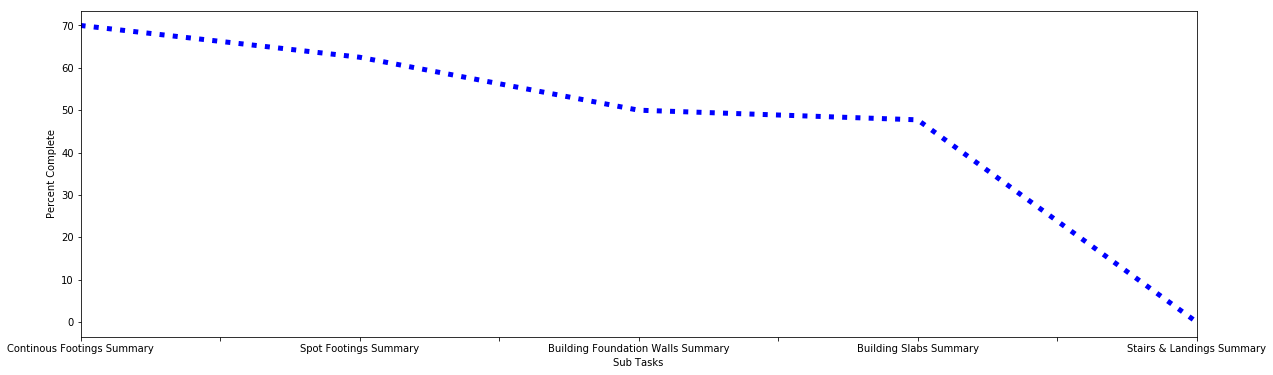

In [139]:
p1 = sub_task_summary['Percent Complete'].plot(figsize=(20,6),ls=':',c='blue',lw='5')
p1.set(xlabel='Sub Tasks',ylabel='Percent Complete')

In [140]:
title1 = "Budget and Forecasted Budget"
xlabel1 = 'Sub Tasks'
ylabel1 = 'Budget'

[Text(0, 0.5, 'Budget'),
 Text(0.5, 0, 'Sub Tasks'),
 Text(0.5, 1.0, 'Budget and Forecasted Budget')]

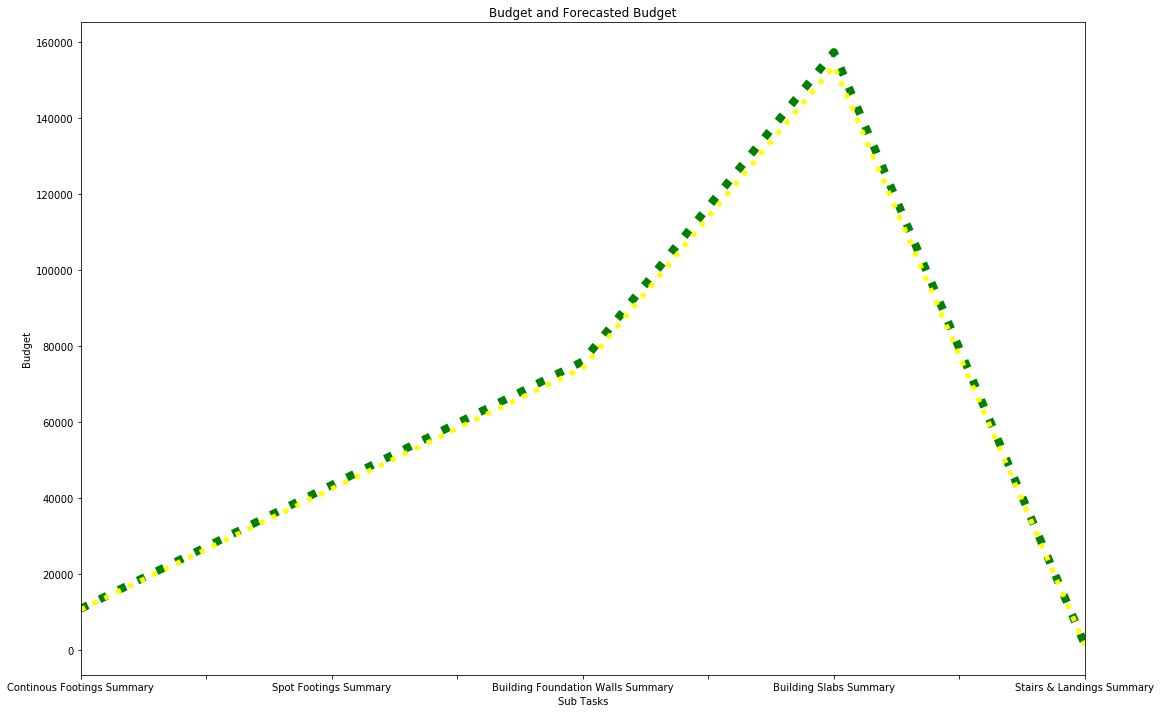

In [145]:
p2 = sub_task_summary['Forecasted Budget'].plot(figsize=(24,12),ls=':',c='green',lw='8')
p3 = sub_task_summary['Budget'].plot(figsize=(18,12),ls=':',c='yellow',lw='5')
p2.set(title=title1,xlabel=xlabel1,ylabel=ylabel1)

<h2> SPI & CPI Control Chart</h2>

In [112]:
title = "SPI and CPI Control Chart"
xlabel = 'Sub Tasks'
ylabel = 'Range'

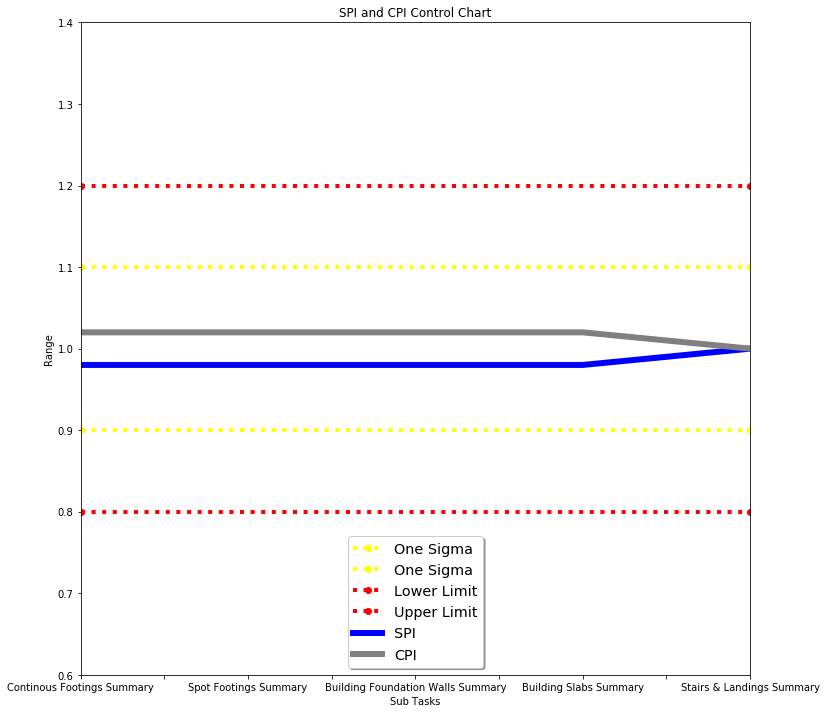

In [125]:
x1, y1 = [0, 4], [0.9, .9]
x2, y2 = [0, 4], [1.1, 1.1]
plt.plot(x1, y1, x2, y2, marker = 'o',c='yellow',ls=':',lw='4')
x3, y3 = [0, 4], [0.8, .8]
x4, y4 = [0, 4], [1.2, 1.2]
plt.plot(x3, y3, x4, y4, marker = 'o',c='red',ls=':',lw='4')
plt.xlim([0, 4])
plt.ylim([.6, 1.4])
p2 = sub_task_summary['SPI'].plot(figsize=(12,12),ls='-',c='Blue',lw='6')
p3 = sub_task_summary['CPI'].plot(figsize=(12,12),ls='-',c='grey',lw='6')
p2.set(title=title,xlabel=xlabel,ylabel=ylabel)
p2.legend(['One Sigma','One Sigma','Lower Limit','Upper Limit','SPI','CPI'],loc='lower center', shadow=True, fontsize='x-large')

In [165]:
df2 = pd.DataFrame(sub_task_summary)
df2

,SPI,CPI,Budget,Realized Risk,Forecasted Budget,Percent Complete
Continous Footings Summary,0.98,1.02,10600,250,10850,70.000000
Spot Footings Summary,0.98,1.02,42400,1000,43400,62.500000
Building Foundation Walls Summary,0.98,1.02,74200,1750,75950,50.000000
Building Slabs Summary,0.98,1.02,153700,3625,157325,47.724138
Stairs & Landings Summary,1.00,1.00,1272,30,1302,0.000000


In [173]:
df3 = df2.drop(columns =['SPI','CPI','Realized Risk', 'Percent Complete'])

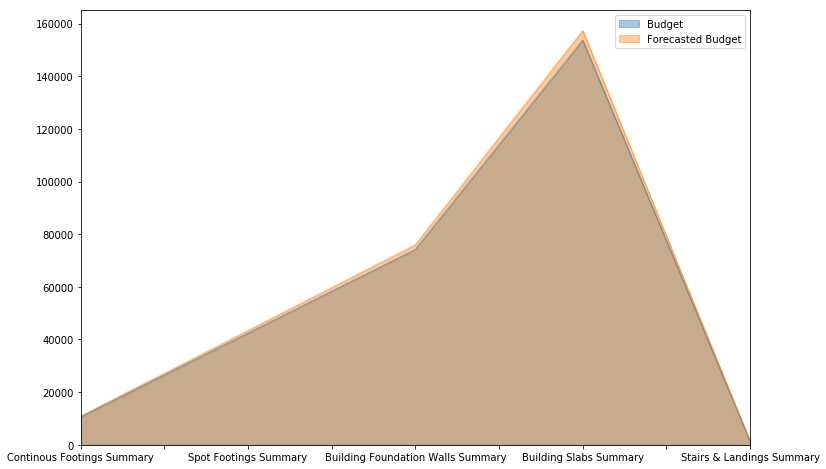

In [176]:
df3.plot.area(stacked=False,alpha=0.4,figsize=(12,8));

In [177]:
df4 = df2.drop(columns =['SPI','CPI','Realized Risk', 'Budget', 'Forecasted Budget'])

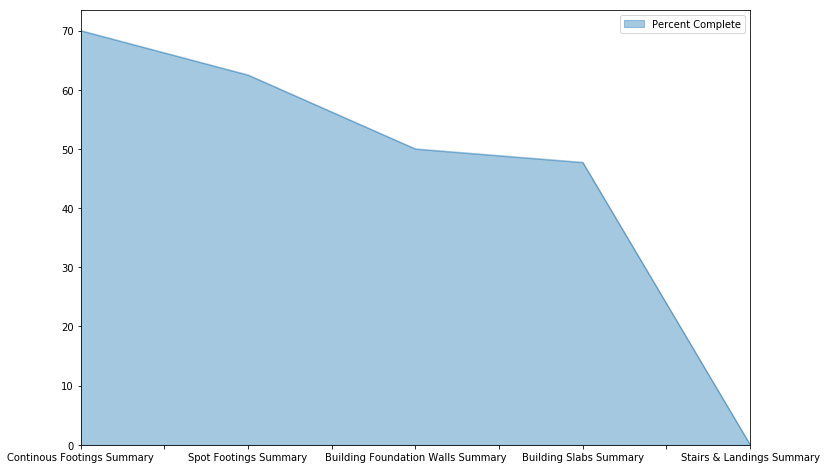

In [180]:
df4.plot.area(stacked=False,alpha=0.4,figsize=(12,8));

In [181]:
df5 = df2.drop(columns =['Realized Risk', 'Budget', 'Forecasted Budget', 'Percent Complete'])

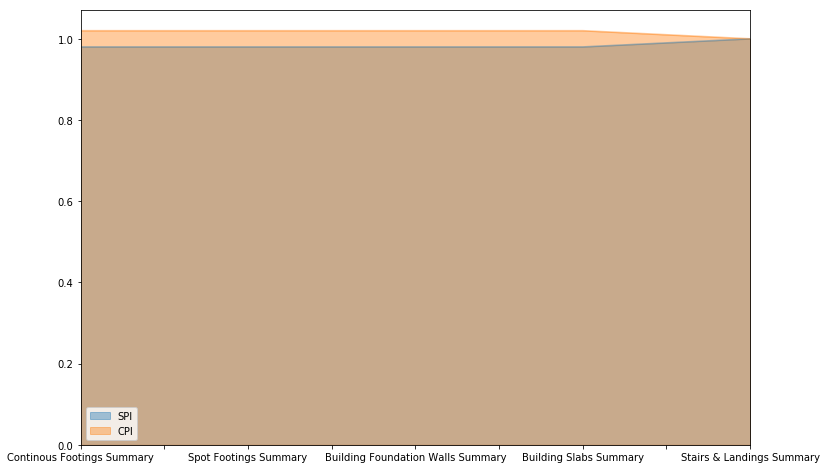

In [182]:
df5.plot.area(stacked=False,alpha=0.4,figsize=(12,8));

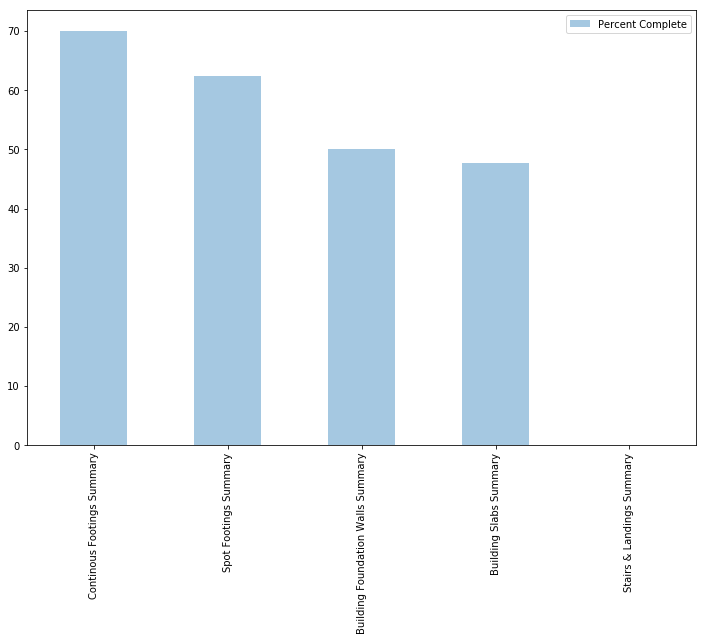

In [183]:
df4.plot.bar(stacked=False,alpha=0.4,figsize=(12,8));